Make model

Overview with AI studio Auto-model
- Using Cleaned data to make a overview

![alt text](ImageResource/AI-overview.png)

From overview, select:
- Logistic Regression 
- Decision Tree
- Random Forest Classify

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay



In [2]:

# Load and encode data
original_data = pd.read_csv('CleanedData.csv')
encode = original_data.apply(LabelEncoder().fit_transform)
data = encode#.sample(100, random_state= 42) # Random sampling

# Split features and target
X = data.drop('class', axis=1)
Y = data['class']


In [3]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Define pipelines
pipeline_RFC = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_DT = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionCV(cv=5, random_state=42, max_iter=1000))
])

# Train models
pipeline_RFC.fit(X, Y)
pipeline_DT.fit(X, Y)
pipeline_LR.fit(X, Y)

# Make predictions
preds_RFC = pipeline_RFC.predict(X_test)
preds_DT = pipeline_DT.predict(X_test)
preds_LR = pipeline_LR.predict(X_test)


In [4]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest Classifier
cv_scores_RFC = cross_val_score(pipeline_RFC, X, Y, cv=5)
print(f'Random forest CV Score: {cv_scores_RFC.mean()}')

# Cross-validation for Decision Tree Classifier
cv_scores_DT = cross_val_score(pipeline_DT, X, Y, cv=5)
print(f'Decision tree CV Score: {cv_scores_DT.mean()}')

# Cross-validation for Logistic Regression
cv_scores_LR = cross_val_score(pipeline_LR, X, Y, cv=5)
print(f'logistic regression CV Score: {cv_scores_LR.mean()}')


Random forest CV Score: 0.8942335733232284
Decision tree CV Score: 0.9319178476695719
logistic regression CV Score: 0.7828311481621827


--- Decision Tree ---
Accuracy: 0.9982767109798129
Precision: 0.9982827911326059
Recall: 0.9982767109798129
F1 Score: 0.9982767848665149
Confusion Matrix:


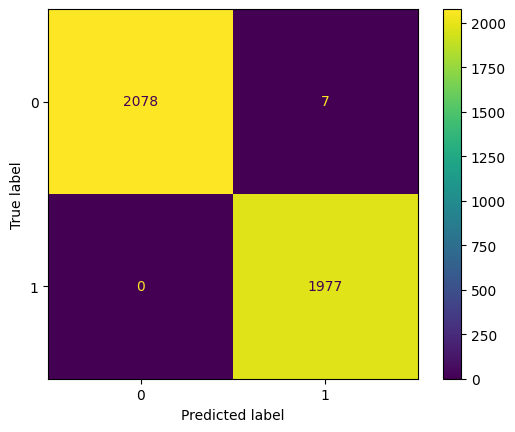



--- Random Forest ---
Accuracy: 0.9982767109798129
Precision: 0.9982827911326059
Recall: 0.9982767109798129
F1 Score: 0.9982767848665149
Confusion Matrix:


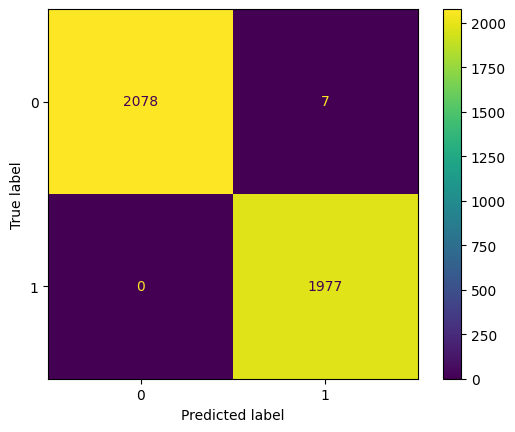



--- Logistic Regression ---
Accuracy: 0.8769079271294928
Precision: 0.8815440463036784
Recall: 0.8769079271294928
F1 Score: 0.876315314940122
Confusion Matrix:


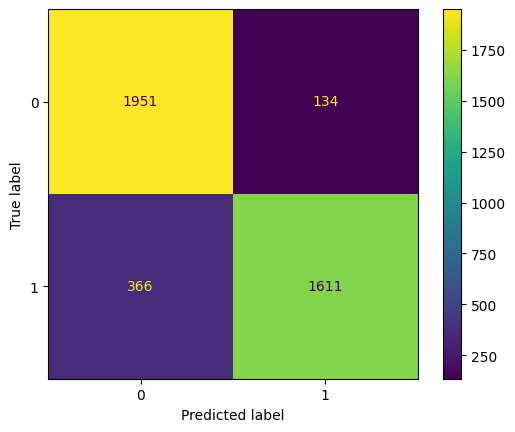

In [5]:
def evaluate_model(y_test, preds, model_name):
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')
  conf_matrix = confusion_matrix(y_test, preds)
  disp = ConfusionMatrixDisplay(conf_matrix)


  print(f"--- {model_name} ---")
  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')
  print('Confusion Matrix:')
  disp.plot()
  plt.show()
  print('\n')

# Evaluate each model and store the metrics
evaluate_model(y_test, preds_DT, "Decision Tree")
evaluate_model(y_test, preds_RFC, "Random Forest")
evaluate_model(y_test, preds_LR, "Logistic Regression")


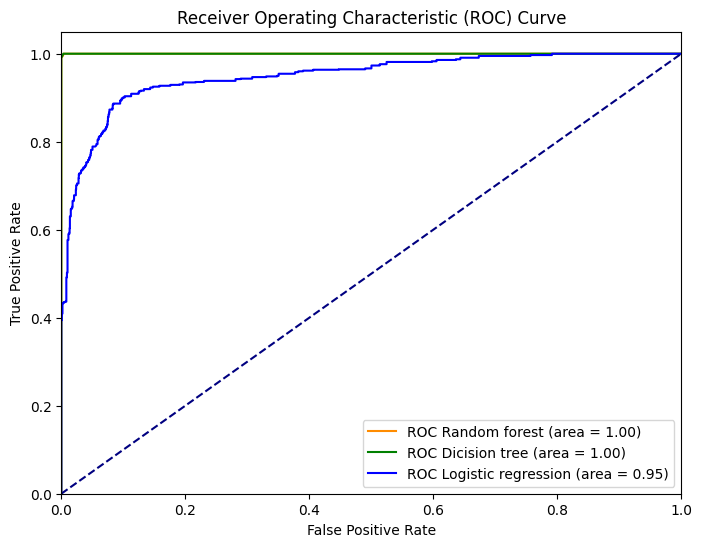

In [6]:
def ROC(pipe):
    prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    return fpr, tpr, auc

RFC_fpr, RFC_tpr, RFC_auc = ROC(pipeline_RFC)
LR_fpr, LR_tpr, LR_auc = ROC(pipeline_LR)
DT_fpr, DT_tpr, DT_auc = ROC(pipeline_DT)

plt.figure(figsize=(8, 6))
plt.plot(RFC_fpr, RFC_tpr, color='darkorange', label='ROC Random forest (area = {:.2f})'.format(RFC_auc))
plt.plot(DT_fpr, DT_tpr, color='green', label='ROC Dicision tree (area = {:.2f})'.format(DT_auc))
plt.plot(LR_fpr, LR_tpr, color='blue', label='ROC Logistic regression (area = {:.2f})'.format(LR_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [7]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline_DT, f)